In [1]:
!pip install -q -U scikit-learn
!pip install -U -q pm4py


from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import pm4py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Abou Keita - Capstone 606/Python Notebooks
import duration_statistics_module
import social_network_analysis_module

/content/drive/.shortcut-targets-by-id/1ciOd6JJn15yFRl7lXb8wUDf4DEFkFYlV/Abou Keita - Capstone 606/Python Notebooks


# Review Example Large CPM

In [3]:
# imports the xes files and oupts the first and last activity
review_example_log = pm4py.read_xes('/content/drive/MyDrive/Abou Keita - Capstone 606/Datasets/review_example_large.xes')
reviewlog= pm4py.convert_to_event_log(review_example_log)
event_log = pm4py.convert_to_event_log(review_example_log)

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

## Understanding the datatset for CPM

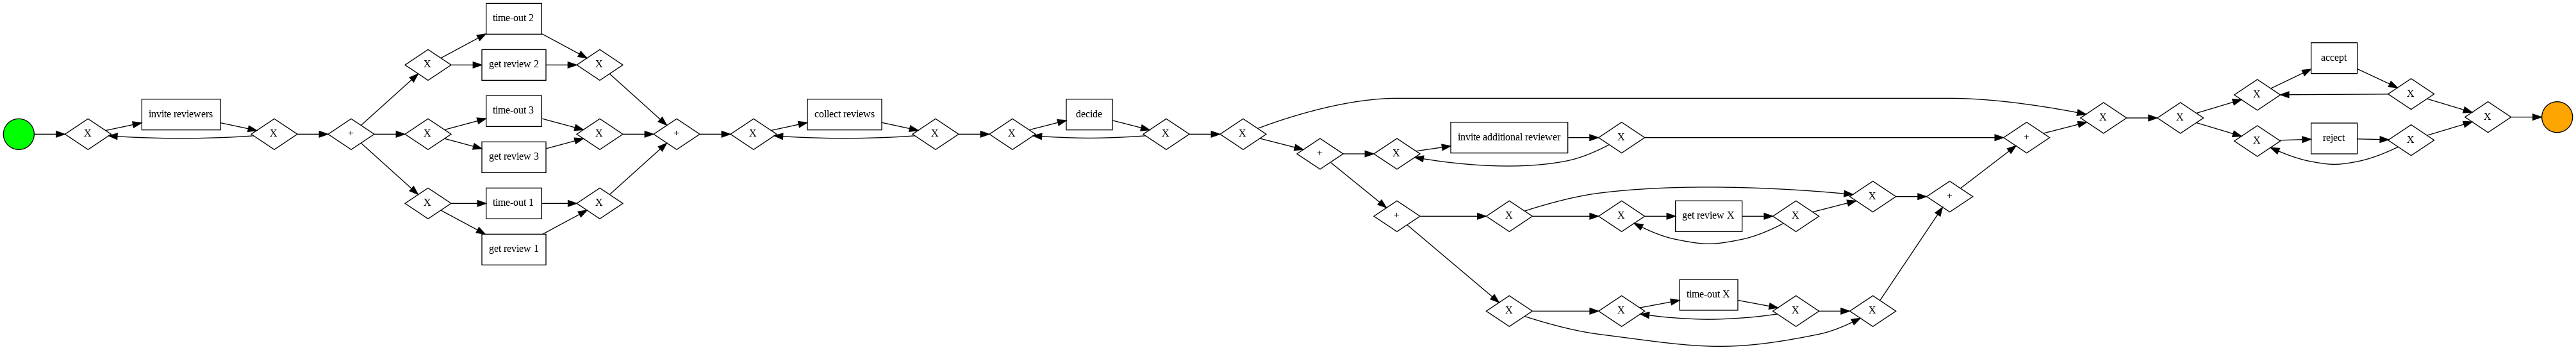

In [6]:
bpmn_model = pm4py.discover_bpmn_inductive(event_log)
pm4py.view_bpmn(bpmn_model)
#This can be hard to see whats going on, se we gonna take a look at the different other graphs for more clarity

<ipython-input-7-8ccd0ce3085e>:3: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)


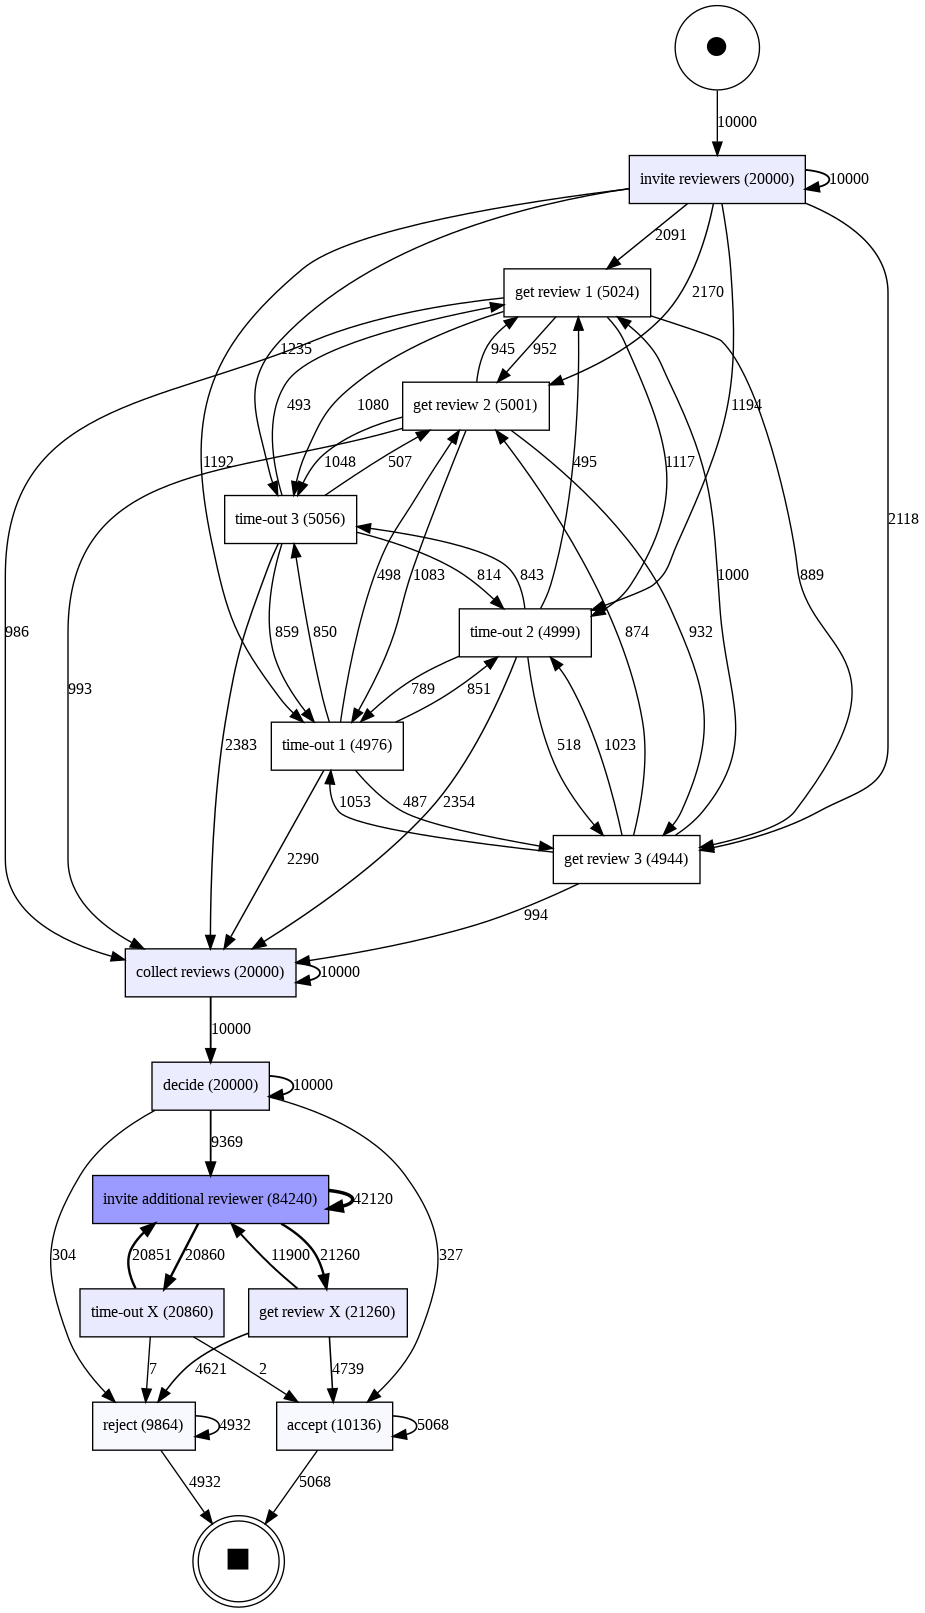

In [7]:
#Direct follow graph
#with the graph, we can see that only 9 total events that continues after the time-out-x and 7 were rejected.
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

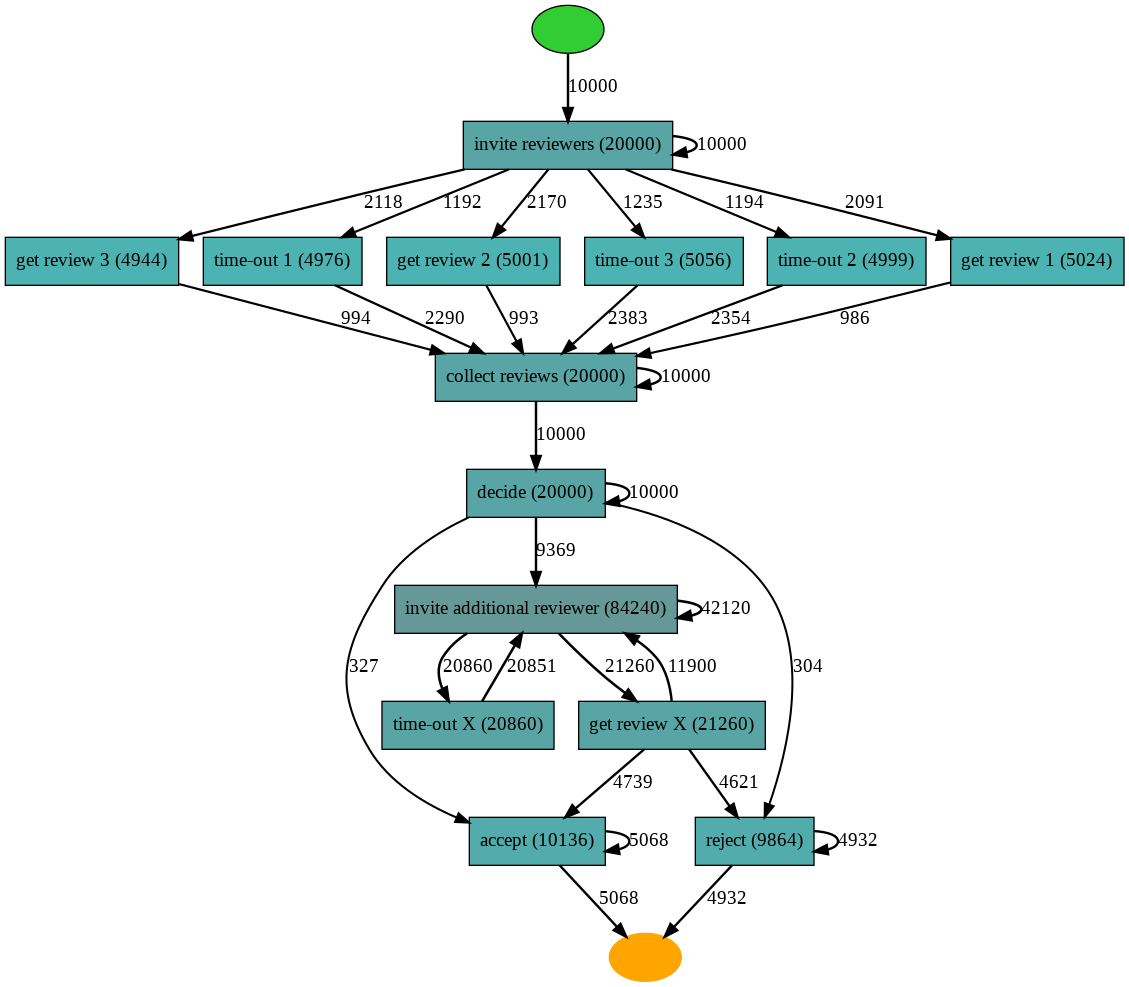

In [8]:
# Heuritic Miner
# this visualization supports our previous assumption so we will asumme that time-out x has no successor activity
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

In [9]:
number_activities = pm4py.get_event_attribute_values(event_log, "concept:name")
number_activities

{'invite reviewers': 20000,
 'get review 3': 4944,
 'get review 1': 5024,
 'time-out 2': 4999,
 'collect reviews': 20000,
 'decide': 20000,
 'invite additional reviewer': 84240,
 'get review X': 21260,
 'reject': 9864,
 'time-out 1': 4976,
 'get review 2': 5001,
 'time-out X': 20860,
 'accept': 10136,
 'time-out 3': 5056}

In [10]:
# convert to a pandas dataframe and display first 50 rows
df_eventlog = pm4py.convert_to_dataframe(event_log)
df_eventlog.head(50)

org:resource            time:timestamp                concept:name  \
0          Mike 2005-12-31 23:00:00+00:00            invite reviewers   
1          Mike 2006-01-04 23:00:00+00:00            invite reviewers   
2          Mary 2006-01-04 23:00:00+00:00                get review 3   
3           Pam 2006-01-05 23:00:00+00:00                get review 1   
4   __INVALID__ 2006-01-14 23:00:00+00:00                  time-out 2   
5          Anne 2006-01-15 23:00:00+00:00             collect reviews   
6          Anne 2006-01-15 23:00:00+00:00             collect reviews   
7           Wil 2006-01-15 23:00:00+00:00                      decide   
8           Wil 2006-01-16 23:00:00+00:00                      decide   
9          Mike 2006-01-16 23:00:00+00:00  invite additional reviewer   
10         Mike 2006-01-20 23:00:00+00:00  invite additional reviewer   
11         Mary 2006-01-23 23:00:00+00:00                get review X   
12         Mike 2006-01-23 23:00:00+00:00                      reject   
13         Mike 2006-01-27 23:00:00+00:00                      reject   
14         Anne 2006-02-05 23:00:00+00:00            invite reviewers   
15         Anne 2006-02-08 23:00:00+00:00            invite reviewers   
16  __INVALID__ 2006-02-08 23:00:00+00:00                  time-out 1   
17        Carol 2006-02-11 23:00:00+00:00                get review 3   
18         Pete 2006-02-13 23:00:00+00:00                get review 2   
19         Mike 2006-02-19 23:00:00+00:00             collect reviews   
20         Mike 2006-02-23 23:00:00+00:00             collect reviews   
21          Wil 2006-02-23 23:00:00+00:00                      decide   
22          Wil 2006-02-27 23:00:00+00:00                      decide   
23         Anne 2006-03-17 23:00:00+00:00  invite additional reviewer   
24         Anne 2006-03-22 23:00:00+00:00  invite additional reviewer   
25  __INVALID__ 2006-03-30 23:00:00+00:00                  time-out X   
26         Anne 2006-10-30 23:00:00+00:00  invite additional reviewer   
27         Anne 2006-10-30 23:00:00+00:00  invite additional reviewer   
28  __INVALID__ 2006-11-09 23:00:00+00:00                  time-out X   
29         Mike 2006-11-13 23:00:00+00:00  invite additional reviewer   
30         Mike 2006-11-13 23:00:00+00:00  invite additional reviewer   
31  __INVALID__ 2006-11-13 23:00:00+00:00                  time-out X   
32         Anne 2007-01-04 23:00:00+00:00  invite additional reviewer   
33         Anne 2007-01-06 23:00:00+00:00  invite additional reviewer   
34         Pete 2007-01-08 23:00:00+00:00                get review X   
35         Mike 2007-07-07 23:00:00+00:00  invite additional reviewer   
36         Mike 2007-07-09 23:00:00+00:00  invite additional reviewer   
37  __INVALID__ 2007-07-17 23:00:00+00:00                  time-out X   
38         Mike 2008-01-04 23:00:00+00:00  invite additional reviewer   
39         Mike 2008-01-08 23:00:00+00:00  invite additional reviewer   
40         Sara 2008-01-10 23:00:00+00:00                get review X   
41         Anne 2008-01-14 23:00:00+00:00                      reject   
42         Anne 2008-01-16 23:00:00+00:00                      reject   
43         Mike 2007-04-03 23:00:00+00:00            invite reviewers   
44         Mike 2007-04-05 23:00:00+00:00            invite reviewers   
45         Mary 2007-04-07 23:00:00+00:00                get review 3   
46  __INVALID__ 2007-04-12 23:00:00+00:00                  time-out 1   
47  __INVALID__ 2007-04-15 23:00:00+00:00                  time-out 2   
48         Anne 2007-05-15 23:00:00+00:00             collect reviews   
49         Anne 2007-05-18 23:00:00+00:00             collect reviews   

   lifecycle:transition  result case:concept:name            case:description  
0                 start     NaN                 1  Simulated process instance  
1              complete     NaN                 1  Simulated process instance  
2              complete  reject        

In [11]:
#num of event, cases, resources invovled
num_event = len(df_eventlog)
num_cases = len(df_eventlog['case:concept:name'].unique())
print("number of event: {} \n Number of unique cases: {}".format(num_event, num_cases))
ppl_invovled = df_eventlog['org:resource'].unique()
num_ppl_invovled = len(df_eventlog['org:resource'].unique())
print("The resources or people invovled are: {} \n The number of resources are: {}".format(ppl_invovled, num_ppl_invovled))

number of event: 236360 
 Number of unique cases: 10000
The resources or people invovled are: ['Mike' 'Mary' 'Pam' '__INVALID__' 'Anne' 'Wil' 'Carol' 'Pete' 'Sara'
 'John' 'Sam'] 
 The number of resources are: 11


In [12]:
df_eventlog['concept:name'].unique()

array(['invite reviewers', 'get review 3', 'get review 1', 'time-out 2',
       'collect reviews', 'decide', 'invite additional reviewer',
       'get review X', 'reject', 'time-out 1', 'get review 2',
       'time-out X', 'accept', 'time-out 3'], dtype=object)

In [13]:
#There are 14 activites involved
df_eventlog['concept:name'].nunique()

14

## Critical Path Method

In [14]:
df_eventlog = review_example_log

In [15]:
#create a copy of the original df that will be used to find the critical path
cpm_df = df_eventlog.copy(deep=True)
cpm_df

org:resource            time:timestamp                concept:name  \
0              Mike 2005-12-31 23:00:00+00:00            invite reviewers   
1              Mike 2006-01-04 23:00:00+00:00            invite reviewers   
2              Mary 2006-01-04 23:00:00+00:00                get review 3   
3               Pam 2006-01-05 23:00:00+00:00                get review 1   
4       __INVALID__ 2006-01-14 23:00:00+00:00                  time-out 2   
...             ...                       ...                         ...   
236355         Anne 2223-07-16 23:00:00+00:00  invite additional reviewer   
236356         Anne 2223-07-16 23:00:00+00:00  invite additional reviewer   
236357          Sam 2223-07-20 23:00:00+00:00                get review X   
236358         Mike 2223-08-05 23:00:00+00:00                      accept   
236359         Mike 2223-08-09 23:00:00+00:00                      accept   

       lifecycle:transition case:concept:name            case:description  \
0                     start                 1  Simulated process instance   
1                  complete                 1  Simulated process instance   
2                  complete                 1  Simulated process instance   
3                  complete                 1  Simulated process instance   
4                  complete                 1  Simulated process instance   
...                     ...               ...                         ...   
236355                start              9999  Simulated process instance   
236356             complete              9999  Simulated process instance   
236357             complete              9999  Simulated process instance   
236358                start              9999  Simulated process instance   
236359             complete              9999  Simulated process instance   

        result  
0          NaN  
1          NaN  
2       reject  
3       reject  
4          NaN  
...        ...  
236355     NaN  
236356     NaN  
236357  accept  
236358     NaN  
236359     NaN  

[236360 rows x 7 columns]

In [16]:
import datetime

# Create a pivot table of the start (minimum) and end (maximum) timestamps associated with each case:
case_starts_ends = cpm_df.pivot_table(index='case:concept:name', aggfunc={'time:timestamp': ['min', 'max']}) 
case_starts_ends = case_starts_ends.reset_index() 
case_starts_ends.columns = ['case:concept:name', 'caseend', 'casestart'] 
# Merge with the main event log data so that for each row we have the start and end times.
cpm_df = cpm_df.merge(case_starts_ends, on='case:concept:name') 
# Calculate the relative time by subtracting the process start time from the event timestamp
cpm_df['relativetime'] = cpm_df['time:timestamp'] - cpm_df['casestart']
# Convert relative times to more friendly measures
## seconds
cpm_df['relativetime_s'] = cpm_df['relativetime'].dt.seconds + 86400*cpm_df['relativetime'].dt.days 
## days
cpm_df['relativedays'] = cpm_df['relativetime'].dt.days

In [17]:
cpm_df

org:resource            time:timestamp                concept:name  \
0              Mike 2005-12-31 23:00:00+00:00            invite reviewers   
1              Mike 2006-01-04 23:00:00+00:00            invite reviewers   
2              Mary 2006-01-04 23:00:00+00:00                get review 3   
3               Pam 2006-01-05 23:00:00+00:00                get review 1   
4       __INVALID__ 2006-01-14 23:00:00+00:00                  time-out 2   
...             ...                       ...                         ...   
236355         Anne 2223-07-16 23:00:00+00:00  invite additional reviewer   
236356         Anne 2223-07-16 23:00:00+00:00  invite additional reviewer   
236357          Sam 2223-07-20 23:00:00+00:00                get review X   
236358         Mike 2223-08-05 23:00:00+00:00                      accept   
236359         Mike 2223-08-09 23:00:00+00:00                      accept   

       lifecycle:transition case:concept:name            case:description  \
0                     start                 1  Simulated process instance   
1                  complete                 1  Simulated process instance   
2                  complete                 1  Simulated process instance   
3                  complete                 1  Simulated process instance   
4                  complete                 1  Simulated process instance   
...                     ...               ...                         ...   
236355                start              9999  Simulated process instance   
236356             complete              9999  Simulated process instance   
236357             complete              9999  Simulated process instance   
236358                start              9999  Simulated process instance   
236359             complete              9999  Simulated process instance   

        result                   caseend                 casestart  \
0          NaN 2006-01-27 23:00:00+00:00 2005-12-31 23:00:00+00:00   
1          NaN 2006-01-27 23:00:00+00:00 2005-12-31 23:00:00+00:00   
2       reject 2006-01-27 23:00:00+00:00 2005-12-31 23:00:00+00:00   
3       reject 2006-01-27 23:00:00+00:00 2005-12-31 23:00:00+00:00   
4          NaN 2006-01-27 23:00:00+00:00 2005-12-31 23:00:00+00:00   
...        ...                       ...                       ...   
236355     NaN 2223-08-09 23:00:00+00:00 2141-09-04 23:00:00+00:00   
236356     NaN 2223-08-09 23:00:00+00:00 2141-09-04 23:00:00+00:00   
236357  accept 2223-08-09 23:00:00+00:00 2141-09-04 23:00:00+00:00   
236358     NaN 2223-08-09 23:00:00+00:00 2141-09-04 23:00:00+00:00   
236359     NaN 2223-08-09 23:00:00+00:00 2141-09-04 23:00:00+00:00   

       relativetime  relativetime_s  relativedays  
0            0 days               0             0  
1            4 days          345600             4  
2            4 days          345600             4  
3            5 days          432000             5  
4           14 days         1209600            14  
...             ...             ...           ...  
236355   29899 days      2583273600         29899  
236356   29899 days      2583273600         29899  
236357   29903 days      2583619200         29903  
236358   29919 days      2585001600         29919  
236359   29923 days      2585347200         29923  

[236360 rows x 12 columns]

In [18]:
# the average duration of each activities
# we will keep the duration in seconds before converting them to days at the end after finding out the Critical Path
# https://stackoverflow.com/questions/42474951/pandas-get-average-time-interval-within-groups
#import datetime

#Shows the avg duration of each activites throughout the entire event log in seconds
#avg_duration_activity_days = cpm_df.groupby('activity',dropna=True).agg({'timestamp': lambda x: x.diff().astype('timedelta64[s]').mean().astype(int)})
#avg_duration_activity_days

In [19]:
#import math
#the first column represent the timing in seconds, while the second column represent the timing in days rounded up
#avg_duration_activity_days['avg_duration_days'] = avg_duration_activity_days['timestamp'] / 86400
#avg_duration_activity_days['avg_duration_days'] = avg_duration_activity_days['avg_duration_days'].apply(np.ceil).astype(int)
#avg_duration_activity_days

In [20]:
#export the dataframe into csv to do the cpm calculation
#cpm_df.to_csv('cmp.csv',index=True, header=True)

Excel of the CPM showwing the ES,EF,LS,LF,Total Float Free Float in seconds

To understand the caluclation of what this means. The link below explains the technique used to find th most optimal path.
1. https://asana.com/resources/critical-path-method
2. https://www.smartsheet.com/critical-path-method

In [21]:
import pandas
# Now import the csv of the manually calculated Critical Path
cp = pd.read_excel(r"/content/drive/MyDrive/Abou Keita - Capstone 606/Datasets/CPM File/Critical Path Methods.xlsx", sheet_name='Review Example Agg Max CPM')
cp

Activity  \
0             invite reviewers   
1                 get review 1   
2                   time-out 1   
3                 get review 2   
4                   time-out 2   
5                 get review 3   
6                   time-out 3   
7              collect reviews   
8                       decide   
9   invite additional reviewer   
10                get review X   
11                  time-out X   
12                      accept   
13                      reject   
14              total duration   

                                           Dependency  timestamp_in_days  \
0                                                 NaN               12.0   
1                                    invite reviewers               17.0   
2                                    invite reviewers               22.0   
3                                    invite reviewers               17.0   
4                                    invite reviewers               22.0   
5                                    invite reviewers               17.0   
6                                    invite reviewers               22.0   
7   get review 1,time-out 1,get review 2,time-out ...              250.0   
8                                     collect reviews              251.0   
9                                              decide            87108.0   
10                         invite additional reviewer            87109.0   
11                         invite additional reviewer            86967.0   
12                            get review X,time-out X            85800.0   
13                            get review X,time-out X            87113.0   
14                                             261865                NaN   

          ES        EF        LS        LF  total_float  free_float  
0        0.0      12.0       0.0      12.0          0.0         0.0  
1       12.0      29.0      17.0      34.0          5.0         5.0  
2       12.0      34.0      12.0      34.0          0.0         0.0  
3       12.0      29.0      17.0      34.0          5.0         5.0  
4       12.0      34.0      12.0      34.0          0.0         0.0  
5       12.0      29.0      17.0      34.0          0.0         5.0  
6       12.0      34.0      12.0      34.0          0.0         0.0  
7       34.0     284.0      34.0     284.0          0.0         0.0  
8      284.0     535.0     284.0     535.0          0.0     87108.0  
9      535.0   87643.0     535.0   87643.0          0.0         0.0  
10   87643.0  174752.0   87643.0  174752.0          0.0         0.0  
11   87643.0  174610.0   87785.0  174752.0        142.0       142.0  
12  174752.0  260552.0  176065.0  261865.0       1313.0    -85800.0  
13  174752.0  261865.0  174752.0  261865.0          0.0    -87113.0  
14       NaN       NaN       NaN       NaN          NaN         NaN

In [22]:
import numpy as np
cp = cp.replace(np.nan, '', regex=True)
cp

Activity  \
0             invite reviewers   
1                 get review 1   
2                   time-out 1   
3                 get review 2   
4                   time-out 2   
5                 get review 3   
6                   time-out 3   
7              collect reviews   
8                       decide   
9   invite additional reviewer   
10                get review X   
11                  time-out X   
12                      accept   
13                      reject   
14              total duration   

                                           Dependency timestamp_in_days  \
0                                                                  12.0   
1                                    invite reviewers              17.0   
2                                    invite reviewers              22.0   
3                                    invite reviewers              17.0   
4                                    invite reviewers              22.0   
5                                    invite reviewers              17.0   
6                                    invite reviewers              22.0   
7   get review 1,time-out 1,get review 2,time-out ...             250.0   
8                                     collect reviews             251.0   
9                                              decide           87108.0   
10                         invite additional reviewer           87109.0   
11                         invite additional reviewer           86967.0   
12                            get review X,time-out X           85800.0   
13                            get review X,time-out X           87113.0   
14                                             261865                     

          ES        EF        LS        LF total_float free_float  
0        0.0      12.0       0.0      12.0         0.0        0.0  
1       12.0      29.0      17.0      34.0         5.0        5.0  
2       12.0      34.0      12.0      34.0         0.0        0.0  
3       12.0      29.0      17.0      34.0         5.0        5.0  
4       12.0      34.0      12.0      34.0         0.0        0.0  
5       12.0      29.0      17.0      34.0         0.0        5.0  
6       12.0      34.0      12.0      34.0         0.0        0.0  
7       34.0     284.0      34.0     284.0         0.0        0.0  
8      284.0     535.0     284.0     535.0         0.0    87108.0  
9      535.0   87643.0     535.0   87643.0         0.0        0.0  
10   87643.0  174752.0   87643.0  174752.0         0.0        0.0  
11   87643.0  174610.0   87785.0  174752.0       142.0      142.0  
12  174752.0  260552.0  176065.0  261865.0      1313.0   -85800.0  
13  174752.0  261865.0  174752.0  261865.0         0.0   -87113.0  
14

In [23]:
# we will only focus on the activities with total_floar ==0.
# the activites are on the cp
#highlight activities on cp

#https://www.geeksforgeeks.org/highlight-pandas-dataframes-specific-columns-using-applymap/?ref=rp

# function definition
def highlight_cols(s):
   # return 'background-color: % s' % 'red'
   return 'background-color: % s' % 'red'
  
# highlighting the cells
display(cp.style.applymap(highlight_cols, 
                          subset = pd.IndexSlice[cp.total_float ==0, :]))

# The activities on the cp are: invite reviewers, get review,collect reviews,decide,invite additional reviewer, Time_out ore get review, and finally rejecting

In [24]:
# the total duration of the event using this method
td = ['total duration']
total_duration = cp.loc[cp.Activity == 'total duration', 'Dependency'].iloc[0]
print('The relative total duration using the Critical Method is {} days'.format(total_duration) )

The relative total duration using the Critical Method is 261865 days


Get a petri net model representing the Critical Path 

In [25]:
# output a dataframe with only the activites in the cp
rows= ['invite reviewers','time-out 1','time-out 2','time-out 3','collect reviews','decide','invite', 'additional' ,'reviewer','get review X','reject']
cp_df =df_eventlog[df_eventlog['concept:name'].isin(rows)]

In [26]:
cp_df

org:resource            time:timestamp      concept:name  \
0              Mike 2005-12-31 23:00:00+00:00  invite reviewers   
1              Mike 2006-01-04 23:00:00+00:00  invite reviewers   
4       __INVALID__ 2006-01-14 23:00:00+00:00        time-out 2   
5              Anne 2006-01-15 23:00:00+00:00   collect reviews   
6              Anne 2006-01-15 23:00:00+00:00   collect reviews   
...             ...                       ...               ...   
236341          Wil 2141-09-30 23:00:00+00:00            decide   
236342          Wil 2141-10-02 23:00:00+00:00            decide   
236348         Sara 2166-01-08 23:00:00+00:00      get review X   
236351        Carol 2208-07-10 23:00:00+00:00      get review X   
236357          Sam 2223-07-20 23:00:00+00:00      get review X   

       lifecycle:transition case:concept:name            case:description  \
0                     start                 1  Simulated process instance   
1                  complete                 1  Simulated process instance   
4                  complete                 1  Simulated process instance   
5                     start                 1  Simulated process instance   
6                  complete                 1  Simulated process instance   
...                     ...               ...                         ...   
236341                start              9999  Simulated process instance   
236342             complete              9999  Simulated process instance   
236348             complete              9999  Simulated process instance   
236351             complete              9999  Simulated process instance   
236357             complete              9999  Simulated process instance   

        result  
0          NaN  
1          NaN  
4          NaN  
5          NaN  
6          NaN  
...        ...  
236341     NaN  
236342     NaN  
236348  accept  
236351  accept  
236357  accept  

[106155 rows x 7 columns]

In [27]:
# convert the dataframe to an event log
cp_event_log = pm4py.convert_to_event_log(cp_df)

/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


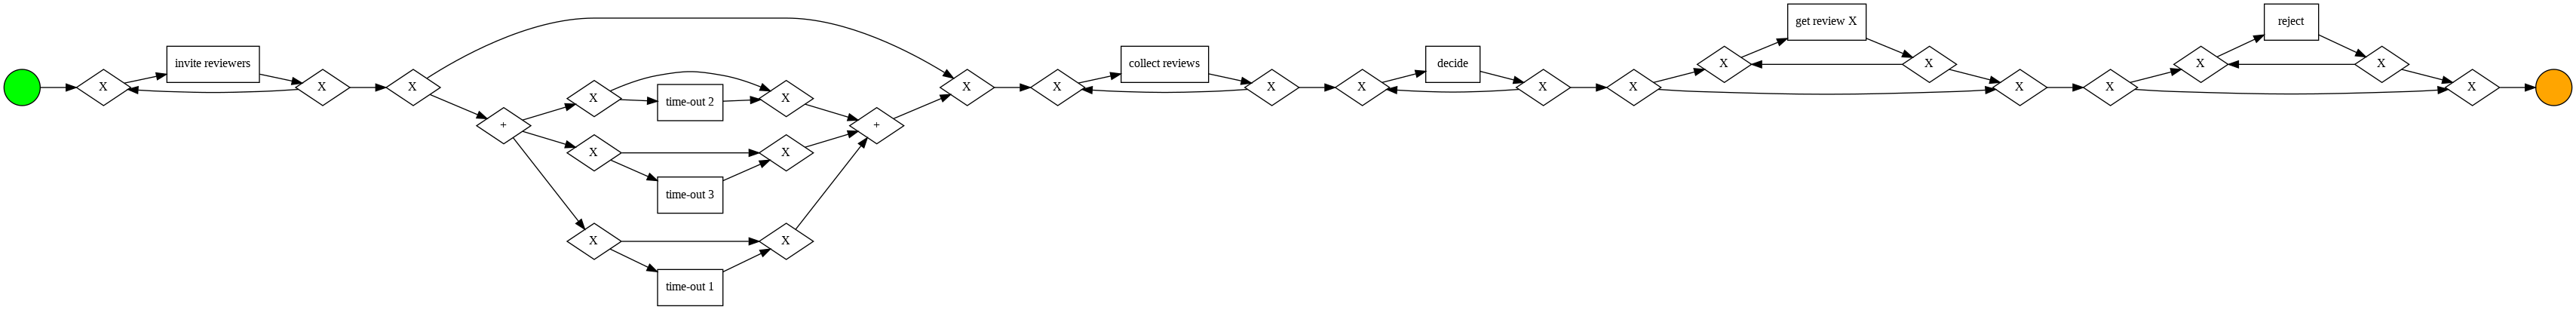

In [28]:
# show the bpmn model
cp_bpmn_model = pm4py.discover_bpmn_inductive(cp_event_log)
pm4py.view_bpmn(cp_bpmn_model)

<ipython-input-31-f8923c35fd7e>:2: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  cpdfg, cp_start_activities, cp_end_activities = pm4py.discover_dfg(cp_event_log)


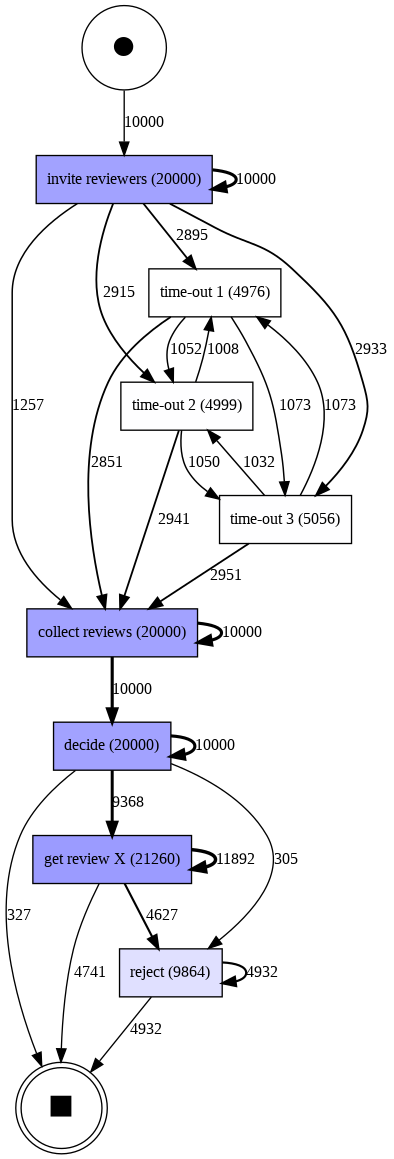

In [31]:
#show the dfg model
cpdfg, cp_start_activities, cp_end_activities = pm4py.discover_dfg(cp_event_log)
pm4py.view_dfg(cpdfg, cp_start_activities, cp_end_activities)

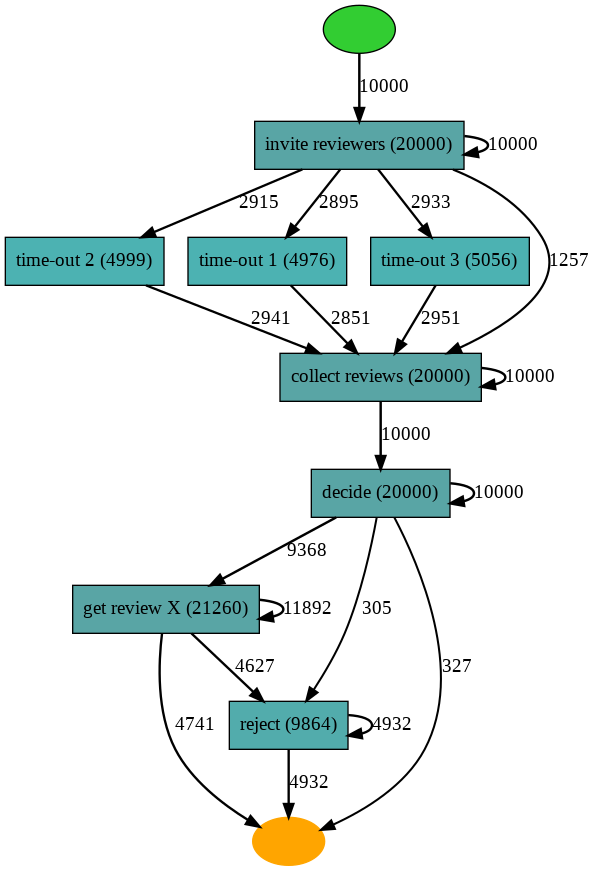

In [32]:
#show the heuritic miner model
cp_map = pm4py.discover_heuristics_net(cp_event_log)
pm4py.view_heuristics_net(cp_map)

In [33]:
# number of event in the cpm event log
num_event = len(cp_df)
num_cases = len(cp_df['case:concept:name'].unique())
print("number of event: {} \n Number of unique cases: {}".format(num_event, num_cases))
ppl_invovled = cp_df['org:resource'].unique()
num_ppl_invovled = len(cp_df['org:resource'].unique())
print("The resources or people invovled are: {} \n The number of resources are: {}".format(ppl_invovled, num_ppl_invovled))

number of event: 106155 
 Number of unique cases: 10000
The resources or people invovled are: ['Mike' '__INVALID__' 'Anne' 'Wil' 'Mary' 'Pete' 'Sara' 'Pam' 'Carol'
 'John' 'Sam'] 
 The number of resources are: 11


### Model Evaluation - Conformance checking

Conformance checking techniques compare a process model with an event log of the same process. The goal is to check if the event log conforms to the model, and, vice versa. Only works with Petri Net models
- https://pm4py.fit.fraunhofer.de/static/assets/api/2.3.0/apihtml#conformance-checking-pm4py-conformance

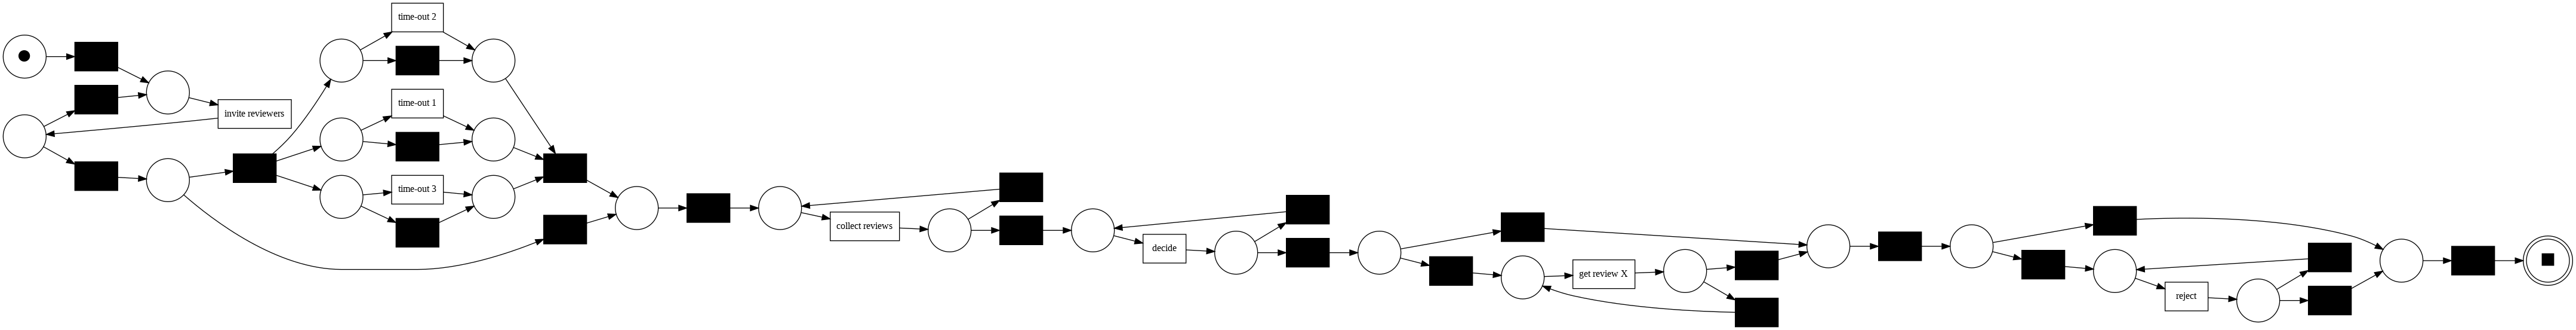

In [34]:
# conversion to petri net
p_net, pnet_im, pnet_fm = pm4py.convert_to_petri_net(cp_bpmn_model)
pm4py.view_petri_net(p_net, pnet_im, pnet_fm)

Soundness

In [35]:
#Checking Behavioral Model Properties
pm4py.check_soundness(p_net, pnet_im, pnet_fm)

#from pm4py.algo.analysis.woflan import algorithm as woflan
#is_sound = woflan.apply(p_net, pnet_im, pnet_fm, parameters={woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: False,
#                                                     woflan.Parameters.PRINT_DIAGNOSTICS: True,
#                                                     woflan.Parameters.RETURN_DIAGNOSTICS: False})

Input is ok.
Petri Net is a workflow net.
Every place is covered by s-components.
There are no dead tasks.
All tasks are live.


/usr/local/lib/python3.8/dist-packages/pm4py/util/lp/variants/scipy_solver.py:26: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  sol = linprog(c, A_ub=Aub, b_ub=bub, A_eq=Aeq, b_eq=beq, method="revised simplex")


True

Replay Fitness

The fitness  of an event log  w.r.t. a model  is the fraction of log behavior that is described by the model.

 1 = all behavior described by the event log is also described by the model

 0 = none of the behavior described by the event log is also described by the mode

 - For token-based replay, the percentage of traces that are completely fit is returned, along with a fitness value that is calculated.
 - For alignments, the percentage of traces that are completely fit is returned, along with a fitness value that is calculated as the average of the fitness values of the single traces.

In [36]:
#token_based_replay compared to orginal log
pm4py.fitness_token_based_replay(reviewlog, p_net, pnet_im, pnet_fm)

replaying log with TBR, completed variants ::   0%|          | 0/4118 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [37]:
#alignments conmpared to original log
alignments_fitness = pm4py.fitness_alignments(reviewlog, p_net, pnet_im, pnet_fm)
alignments_fitness

aligning log, completed variants ::   0%|          | 0/4118 [00:00<?, ?it/s]

{'percFitTraces': 0.0,
 'averageFitness': 0.5498386638410382,
 'percentage_of_fitting_traces': 0.0,
 'average_trace_fitness': 0.5498386638410382,
 'log_fitness': 0.5111194710365281}

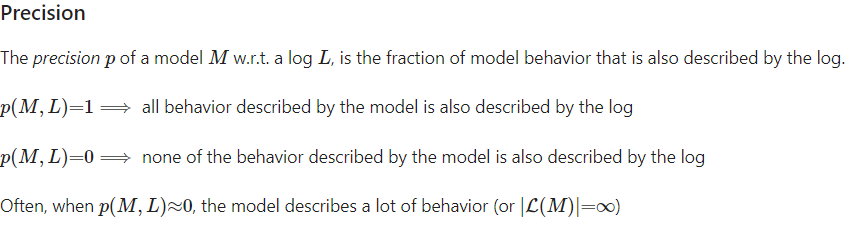

In [38]:
#token_based_replay compared to orginal log
pm4py.precision_token_based_replay(reviewlog, p_net, pnet_im, pnet_fm)

replaying log with TBR, completed variants ::   0%|          | 0/22764 [00:00<?, ?it/s]

0.29172845805258985

In [39]:
#alignments conmpared to original log
pm4py.precision_alignments(reviewlog, p_net, pnet_im, pnet_fm)

computing precision with alignments, completed variants ::   0%|          | 0/22764 [00:00<?, ?it/s]

0.46277259578274577

Diagnostics

In [40]:
alignments = pm4py.conformance_diagnostics_alignments(reviewlog, p_net, pnet_im, pnet_fm)
alignments[0]

aligning log, completed variants ::   0%|          | 0/4118 [00:00<?, ?it/s]

{'alignment': [('>>', None),
  ('invite reviewers', 'invite reviewers'),
  ('>>', None),
  ('invite reviewers', 'invite reviewers'),
  ('get review 3', '>>'),
  ('get review 1', '>>'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('time-out 2', 'time-out 2'),
  ('>>', None),
  ('>>', None),
  ('collect reviews', 'collect reviews'),
  ('>>', None),
  ('collect reviews', 'collect reviews'),
  ('>>', None),
  ('decide', 'decide'),
  ('>>', None),
  ('decide', 'decide'),
  ('invite additional reviewer', '>>'),
  ('invite additional reviewer', '>>'),
  ('>>', None),
  ('>>', None),
  ('get review X', 'get review X'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('reject', 'reject'),
  ('>>', None),
  ('reject', 'reject'),
  ('>>', None),
  ('>>', None)],
 'cost': 40019,
 'visited_states': 50,
 'queued_states': 129,
 'traversed_arcs': 135,
 'lp_solved': 31,
 'fitness': 0.7647058823529411,
 'bwc': 170010}

In [41]:
non_fitting = list(filter(lambda a: a['fitness']<1.0, alignments))
non_fitting[0]

{'alignment': [('>>', None),
  ('invite reviewers', 'invite reviewers'),
  ('>>', None),
  ('invite reviewers', 'invite reviewers'),
  ('get review 3', '>>'),
  ('get review 1', '>>'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('time-out 2', 'time-out 2'),
  ('>>', None),
  ('>>', None),
  ('collect reviews', 'collect reviews'),
  ('>>', None),
  ('collect reviews', 'collect reviews'),
  ('>>', None),
  ('decide', 'decide'),
  ('>>', None),
  ('decide', 'decide'),
  ('invite additional reviewer', '>>'),
  ('invite additional reviewer', '>>'),
  ('>>', None),
  ('>>', None),
  ('get review X', 'get review X'),
  ('>>', None),
  ('>>', None),
  ('>>', None),
  ('reject', 'reject'),
  ('>>', None),
  ('reject', 'reject'),
  ('>>', None),
  ('>>', None)],
 'cost': 40019,
 'visited_states': 50,
 'queued_states': 129,
 'traversed_arcs': 135,
 'lp_solved': 31,
 'fitness': 0.7647058823529411,
 'bwc': 170010}

Generalization: analyse how the log and the process model match

In [42]:
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
generalization_evaluator.apply(reviewlog, p_net, pnet_im, pnet_fm)

replaying log with TBR, completed variants ::   0%|          | 0/4118 [00:00<?, ?it/s]

0.987325008217647

Simplicity: the fourth dimension to analyse a process model. In this case, we define simplicity taking into account only the Petri net model. 

In [43]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simplicity_evaluator.apply(p_net)

0.7000000000000001

### Statistics

In [44]:
#case description
simple_ga_descritpion = duration_statistics_module.duration_statistics.cases_description(cp_event_log)
simple_ga_descritpion

{'1': {'startTime': 1136070000.0,
  'endTime': 1138402800.0,
  'caseDuration': 2332800.0},
 '10': {'startTime': 1139180400.0,
  'endTime': 1200524400.0,
  'caseDuration': 61344000.0},
 '100': {'startTime': 1175641200.0,
  'endTime': 2079817200.0,
  'caseDuration': 904176000.0},
 '1000': {'startTime': 1563231600.0,
  'endTime': 3839958000.0,
  'caseDuration': 2276726400.0},
 '10000': {'startTime': 5418054000.0,
  'endTime': 8504694000.0,
  'caseDuration': 3086640000.0},
 '1001': {'startTime': 1566342000.0,
  'endTime': 3416338800.0,
  'caseDuration': 1849996800.0},
 '1002': {'startTime': 1565650800.0,
  'endTime': 3981740400.0,
  'caseDuration': 2416089600.0},
 '1003': {'startTime': 1564700400.0,
  'endTime': 1671318000.0,
  'caseDuration': 106617600.0},
 '1004': {'startTime': 1561935600.0,
  'endTime': 4571938800.0,
  'caseDuration': 3010003200.0},
 '1005': {'startTime': 1565132400.0,
  'endTime': 3746991600.0,
  'caseDuration': 2181859200.0},
 '1006': {'startTime': 1562454000.0,
  'en

In [45]:
#Gets all the case durations out of the log
simple_ga_case_duration = duration_statistics_module.duration_statistics.all_case_duration(cp_event_log)
simple_ga_case_duration

[432000.0,
 518400.0,
 518400.0,
 518400.0,
 518400.0,
 604800.0,
 604800.0,
 604800.0,
 604800.0,
 604800.0,
 691200.0,
 691200.0,
 691200.0,
 777600.0,
 777600.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 864000.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 950400.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1036800.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123200.0,
 1123

In [46]:
simple_ga_median_case_duration = duration_statistics_module.duration_statistics.median_case_duration(cp_event_log)
print("Median case duration in second: ",simple_ga_median_case_duration, "second")
print("Median case duration in days: ",simple_ga_median_case_duration / 86400, "days")

Median case duration in second:  2654035200.0 second
Median case duration in days:  30718.0 days


### SNA

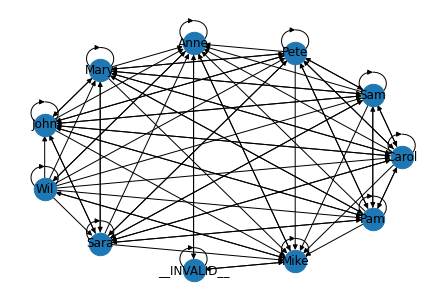

In [47]:
handover_of_work = social_network_analysis_module.sna.handover_of_work(cp_event_log)

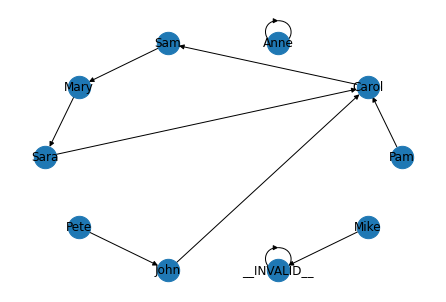

In [48]:
subcontracting = social_network_analysis_module.sna.subcontracting(cp_event_log)

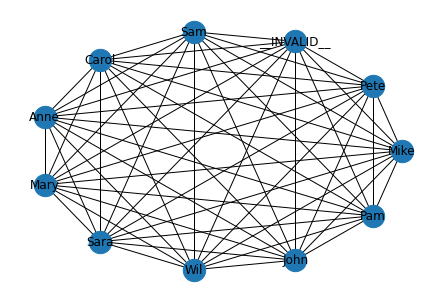

In [49]:
working_together = social_network_analysis_module.sna.working_together(cp_event_log) 

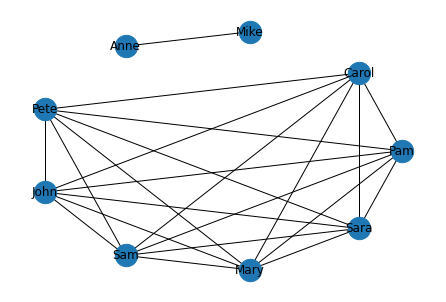

In [50]:
similar_activities = social_network_analysis_module.sna.similar_activities(cp_event_log) 

In [51]:
organizational_mining = social_network_analysis_module.sna.organizational_mining(cp_event_log) 


group_relative_focus
{'Mike': {'invite reviewers': 0.4975, 'time-out 2': 0.0, 'collect reviews': 0.5028, 'decide': 0.0, 'get review X': 0.0, 'reject': 0.5097323600973236, 'time-out 1': 0.0, 'time-out 3': 0.0}, '__INVALID__': {'invite reviewers': 0.0, 'time-out 2': 1.0, 'collect reviews': 0.0, 'decide': 0.0, 'get review X': 0.0, 'reject': 0.0, 'time-out 1': 1.0, 'time-out 3': 1.0}, 'Anne': {'invite reviewers': 0.5025, 'time-out 2': 0.0, 'collect reviews': 0.4972, 'decide': 0.0, 'get review X': 0.0, 'reject': 0.4902676399026764, 'time-out 1': 0.0, 'time-out 3': 0.0}, 'Wil': {'invite reviewers': 0.0, 'time-out 2': 0.0, 'collect reviews': 0.0, 'decide': 1.0, 'get review X': 0.0, 'reject': 0.0, 'time-out 1': 0.0, 'time-out 3': 0.0}, 'Mary': {'invite reviewers': 0.0, 'time-out 2': 0.0, 'collect reviews': 0.0, 'decide': 0.0, 'get review X': 0.14313264346190027, 'reject': 0.0, 'time-out 1': 0.0, 'time-out 3': 0.0}, 'Pete': {'invite reviewers': 0.0, 'time-out 2': 0.0, 'collect reviews': 0.0, '

In [52]:
clustering = social_network_analysis_module.sna.clustering(cp_event_log) 

clustered similar activities metric: {'0': ['John', 'Pam', 'Pete', 'Sara', 'Carol', 'Mary', 'Sam'], '1': ['Anne', 'Mike', 'Wil', '__INVALID__']}
 working together clustered metric: {'2': ['John', 'Pam', 'Pete', 'Sara', 'Carol', 'Mary', 'Sam'], '0': ['Anne', 'Mike'], '1': ['Wil'], '3': ['__INVALID__']}


### EDA

<AxesSubplot: >

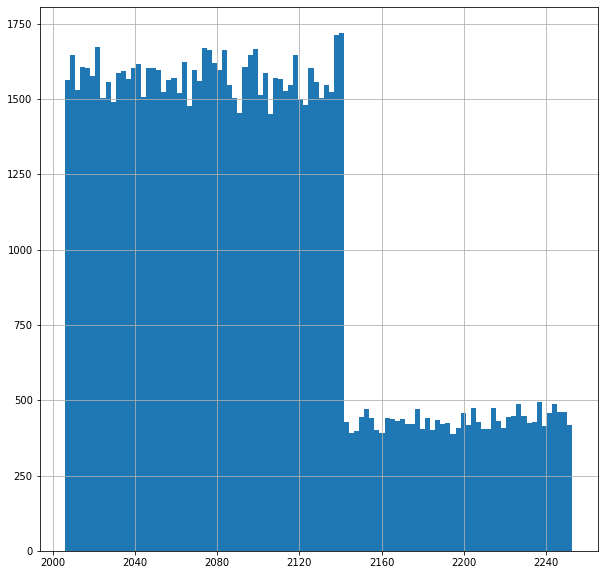

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
cp_df['time:timestamp'].hist(bins=100)

<AxesSubplot: >

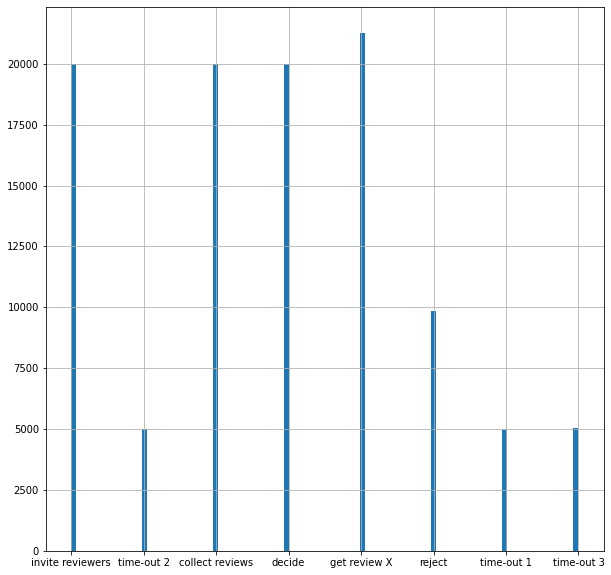

In [54]:
plt.figure(figsize=(10,10))
cp_df['concept:name'].hist(bins=100)

<AxesSubplot: >

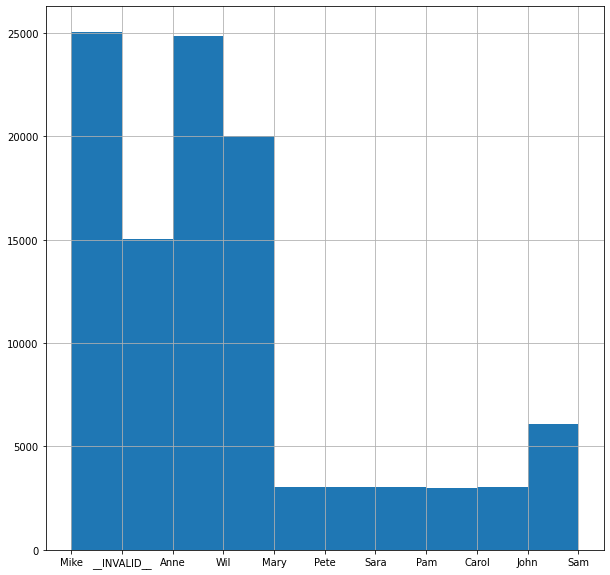

In [55]:
plt.figure(figsize=(10,10))
cp_df['org:resource'].hist(bins=10)

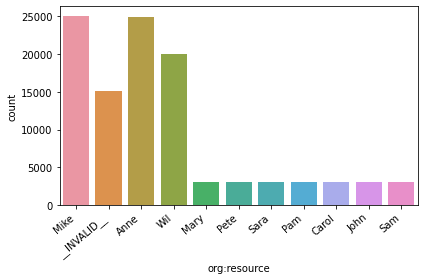

In [56]:
ax=sns.countplot(x=cp_df['org:resource'],data=cp_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")  #it will rotate text on x axis

plt.tight_layout()
plt.show()

In [57]:
activities = pm4py.get_event_attribute_values(cp_df, "concept:name")
resources = pm4py.get_event_attribute_values(cp_df, "org:resource")

In [58]:
activities

{'get review X': 21260,
 'invite reviewers': 20000,
 'collect reviews': 20000,
 'decide': 20000,
 'reject': 9864,
 'time-out 3': 5056,
 'time-out 2': 4999,
 'time-out 1': 4976}

In [59]:
resources

{'Mike': 25034,
 'Anne': 24830,
 'Wil': 20000,
 '__INVALID__': 15031,
 'Pete': 3061,
 'Sara': 3049,
 'Mary': 3043,
 'Sam': 3036,
 'John': 3031,
 'Carol': 3028,
 'Pam': 3012}

### VISPM https://github.com/AdamBanham/vispm

[StaticDottedChartPresentor] Processing event data... 
[StaticDottedChartPresentor] Cannot find concept:name in eventlog attributes. 
[StaticDottedChartPresentor] Ready to plot... 
[StaticDottedChartPresentor] Compiling finished...         
[StaticDottedChartPresentor] Plotting data... 
[StaticDottedChartPresentor] Cleaning up plot... 
[StaticDottedChartPresentor] Plot is ready to show... 


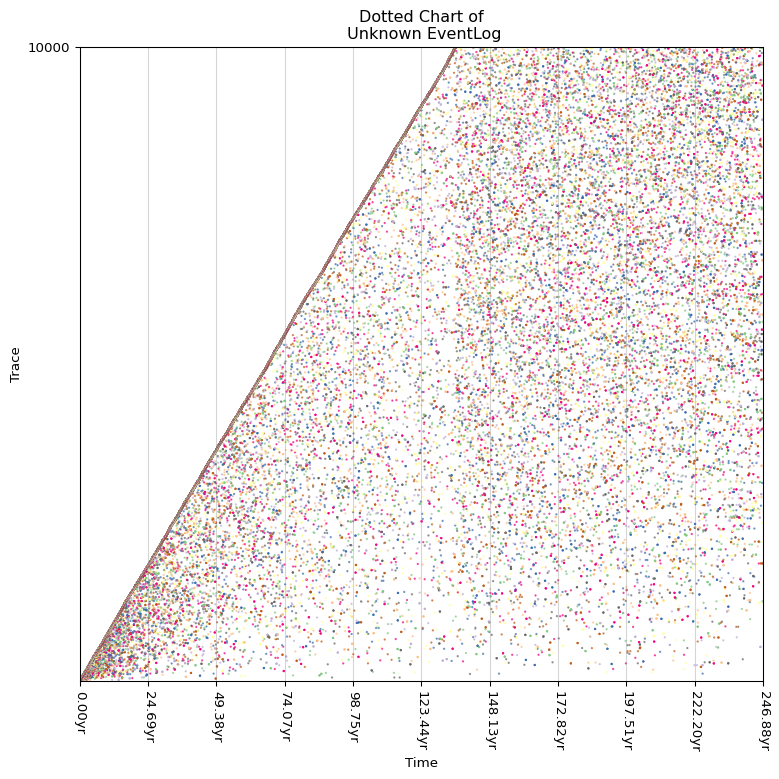

In [61]:
# Static Presentors
from vispm import StaticDottedChartPresentor
from vispm.helpers.colours.colourmaps import HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM,EARTH,COOL_WINTER,CATEGORICAL
from matplotlib import pyplot as plt

presentor = StaticDottedChartPresentor(cp_event_log)
presentor.plot()
plt.show()

[StaticDottedChartPresentor] Processing event data... 
[StaticDottedChartPresentor] Cannot find concept:name in eventlog attributes. 
[StaticDottedChartPresentor] Ready to plot... 
[StaticDottedChartPresentor] Added extension : DottedColourHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedColourHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedColourHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedColourHistogramExtension 
[StaticDottedChartPresentor] Compiling finished...         
[StaticDottedChartPresentor] Plotting data... 
[DottedColourHistogramExtension] ploting histogram... 
[DottedColourHistogramExtension] ploting histogram... 
[DottedColourHistogramExtension] ploting histogram... 
[DottedColourHistogramExtension] ploting histogram... 
[StaticDottedChartPresentor] Cleaning up plot... 
[StaticDottedChartPresentor] Plot is ready to show... 


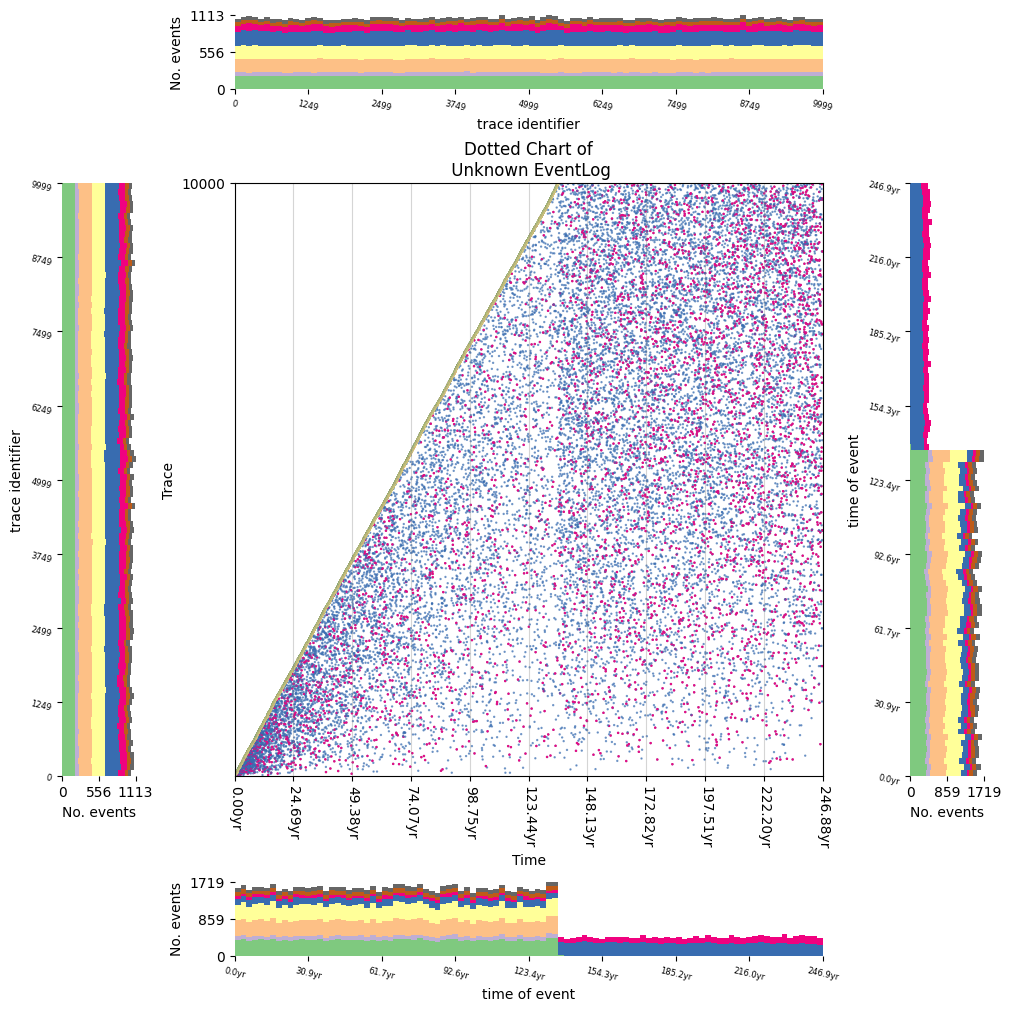

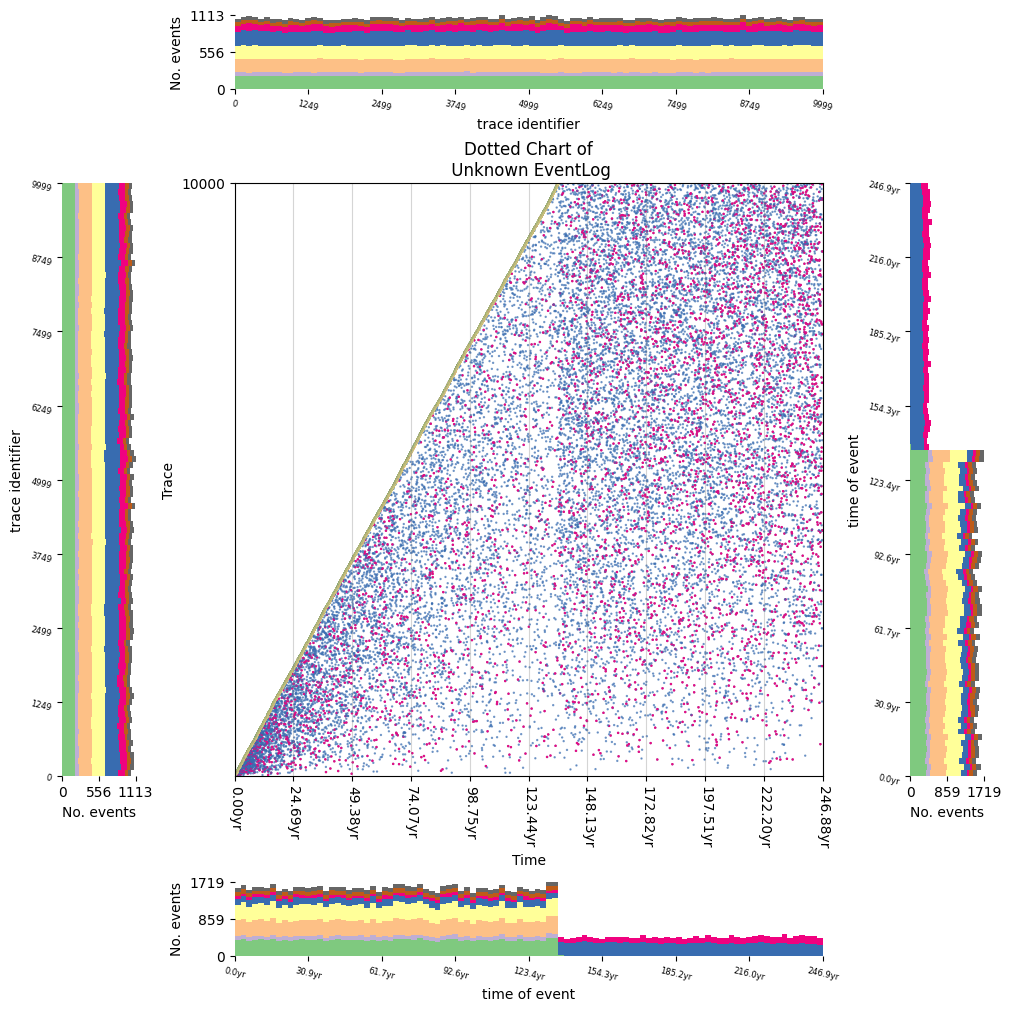

In [62]:
# DottedColourHistogramExtension
#This extension plots a histogram based on the events within a dotted chart. Events will be broken down by colour for each bin.
from vispm import StaticDottedChartPresentor, DottedColourHistogramExtension
from vispm.helpers.colours.colourmaps import HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM,EARTH,COOL_WINTER,CATEGORICAL


presentor = StaticDottedChartPresentor(cp_event_log,dpi=100,
    event_colour_scheme=StaticDottedChartPresentor.EventColourScheme.EventLabel,
    colormap=CATEGORICAL
)
ext = DottedColourHistogramExtension(direction=DottedColourHistogramExtension.Direction.NORTH)
presentor.add_extension(ext)
ext = DottedColourHistogramExtension(direction=DottedColourHistogramExtension.Direction.SOUTH,
         bin_axes=DottedColourHistogramExtension.PlotAxes.X)
presentor.add_extension(ext)
ext = DottedColourHistogramExtension(direction=DottedColourHistogramExtension.Direction.WEST)
presentor.add_extension(ext)
ext = DottedColourHistogramExtension(direction=DottedColourHistogramExtension.Direction.EAST,
         bin_axes=DottedColourHistogramExtension.PlotAxes.X)
presentor.add_extension(ext)
presentor.plot()

[StaticDottedChartPresentor] Processing event data... 
[StaticDottedChartPresentor] Cannot find concept:name in eventlog attributes. 
[StaticDottedChartPresentor] Ready to plot... 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Compiling finished...         
[StaticDottedChartPresentor] Plotting data... 
[DottedEventHistogramExtension] ploting histogram... 
[DottedEventHistogramExtension] Event labels are imputed as :: {'invite reviewers': 'A', 'time-out 1': 'B', 'time-out 2': 'C', 'time-out 3': 'D', 'collect reviews': 'E', 'decide': 'F', 'get review X': 'G', 'reject': 'H'} 
[DottedEventHistogramExtension] ploting histogram... 
[DottedEventHistogramExtension] Event labels are imputed as :: {'invit

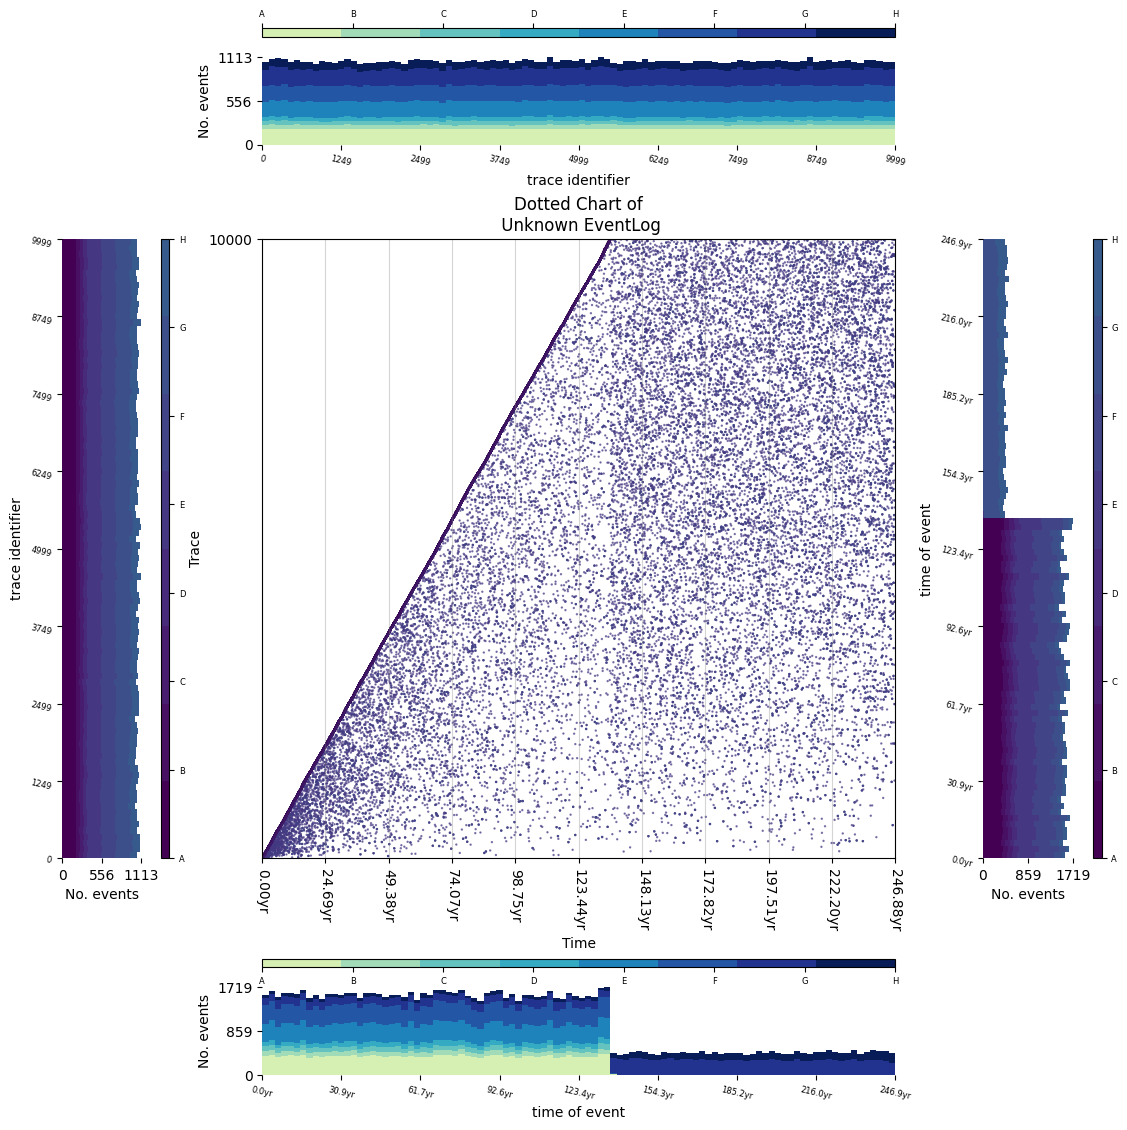

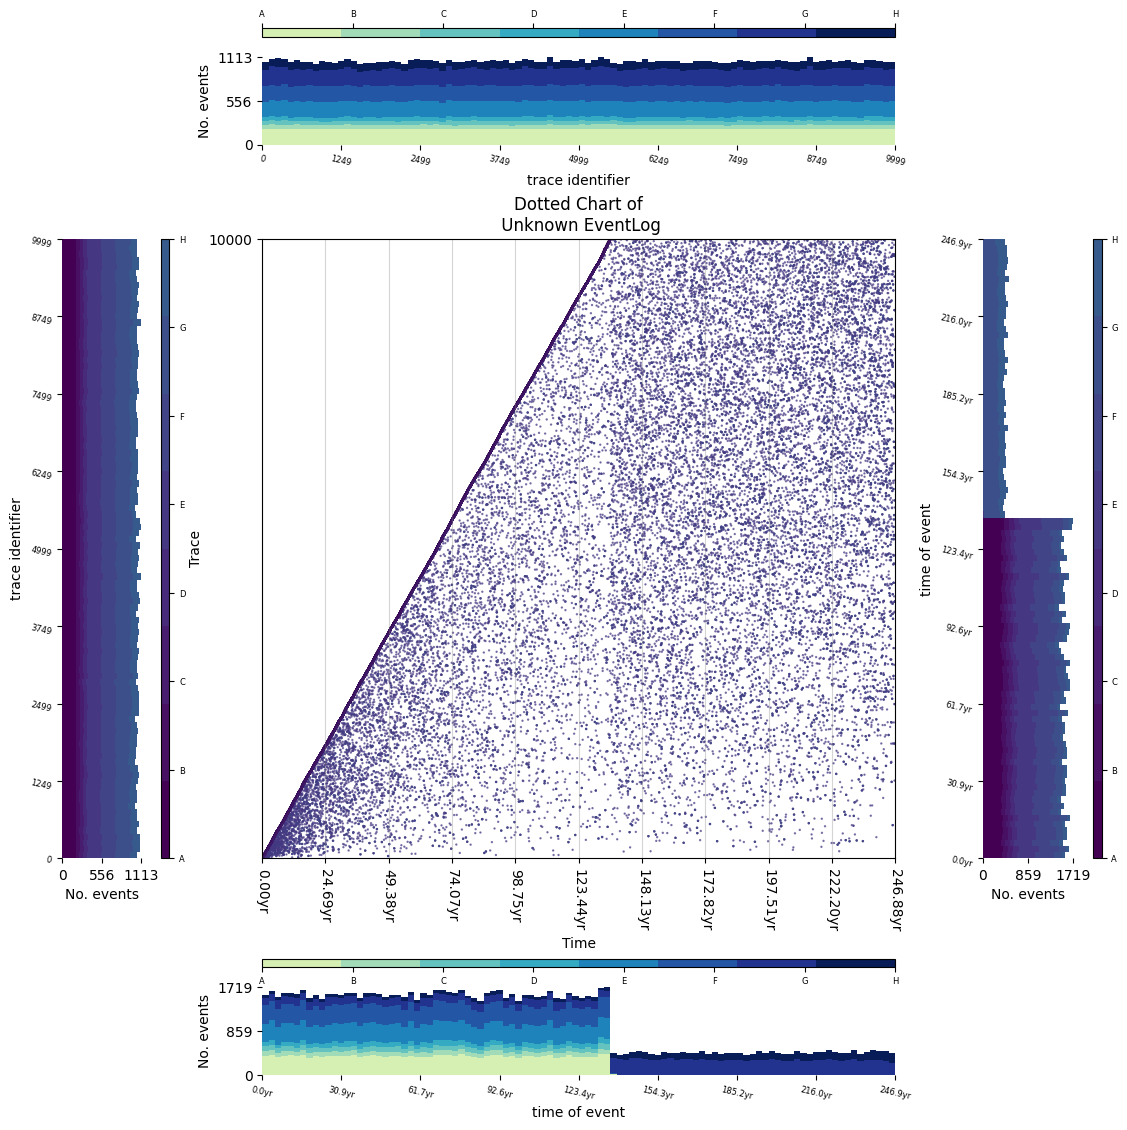

In [63]:
# 1. setup up colour schemes to use
from vispm import StaticDottedChartPresentor, DottedColourHistogramExtension, DottedEventHistogramExtension
from vispm.helpers.colours.colourmaps import HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM
from vispm.helpers.colours.colourmaps import EARTH,COOL_WINTER
from vispm import StaticDottedChartPresentor,DottedColourHistogramExtension

import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

colourmaps = [COOL_WINTER,EARTH,HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM]
seq_colourmap = np.vstack(
    (
    colourmaps[0](np.linspace(0.20,1,8)),
    colourmaps[1](np.linspace(0.20,1,8)),
    colourmaps[2](np.linspace(0.20,1,8)),
    colourmaps[3](np.linspace(0.20,1,8))
    
    )
)
seq_colourmap = ListedColormap(seq_colourmap, name='VARIANCE')
cmap = get_cmap(HIGH_CONTRAST_COOL, 26)


# 2. create a presentor and add extensions
presentor = StaticDottedChartPresentor(cp_event_log,dpi=100,
    event_colour_scheme=StaticDottedChartPresentor.EventColourScheme.EventLabel,
    colormap=cmap
)

ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.SOUTH,
    bin_axes=DottedEventHistogramExtension.PlotAxes.X,
    colourmap=seq_colourmap
)
presentor.add_extension(ext)
ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.NORTH,
    bin_axes=DottedEventHistogramExtension.PlotAxes.Y,
    colourmap=seq_colourmap
)
presentor.add_extension(ext)
ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.WEST,
    bin_axes=DottedEventHistogramExtension.PlotAxes.Y,
    colourmap=cmap
)
presentor.add_extension(ext)
ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.EAST,
    bin_axes=DottedEventHistogramExtension.PlotAxes.X,
    colourmap=cmap
)
presentor.add_extension(ext)

presentor.plot()

[StaticDottedChartPresentor] Processing event data... 
[StaticDottedChartPresentor] Cannot find concept:name in eventlog attributes. 
[StaticDottedChartPresentor] Ready to plot... 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Added extension : DottedEventHistogramExtension 
[StaticDottedChartPresentor] Compiling finished...         
[StaticDottedChartPresentor] Plotting data... 
[DottedEventHistogramExtension] ploting histogram... 
[DottedEventHistogramExtension] Event labels are imputed as :: {'invite reviewers': 'A', 'time-out 1': 'B', 'time-out 2': 'C', 'time-out 3': 'D', 'collect reviews': 'E', 'decide': 'F', 'get review X': 'G', 'reject': 'H'} 
[DottedEventHistogramExtension] ploting histogram... 
[DottedEventHistogramExtension] Event labels are imputed as :: {'invit

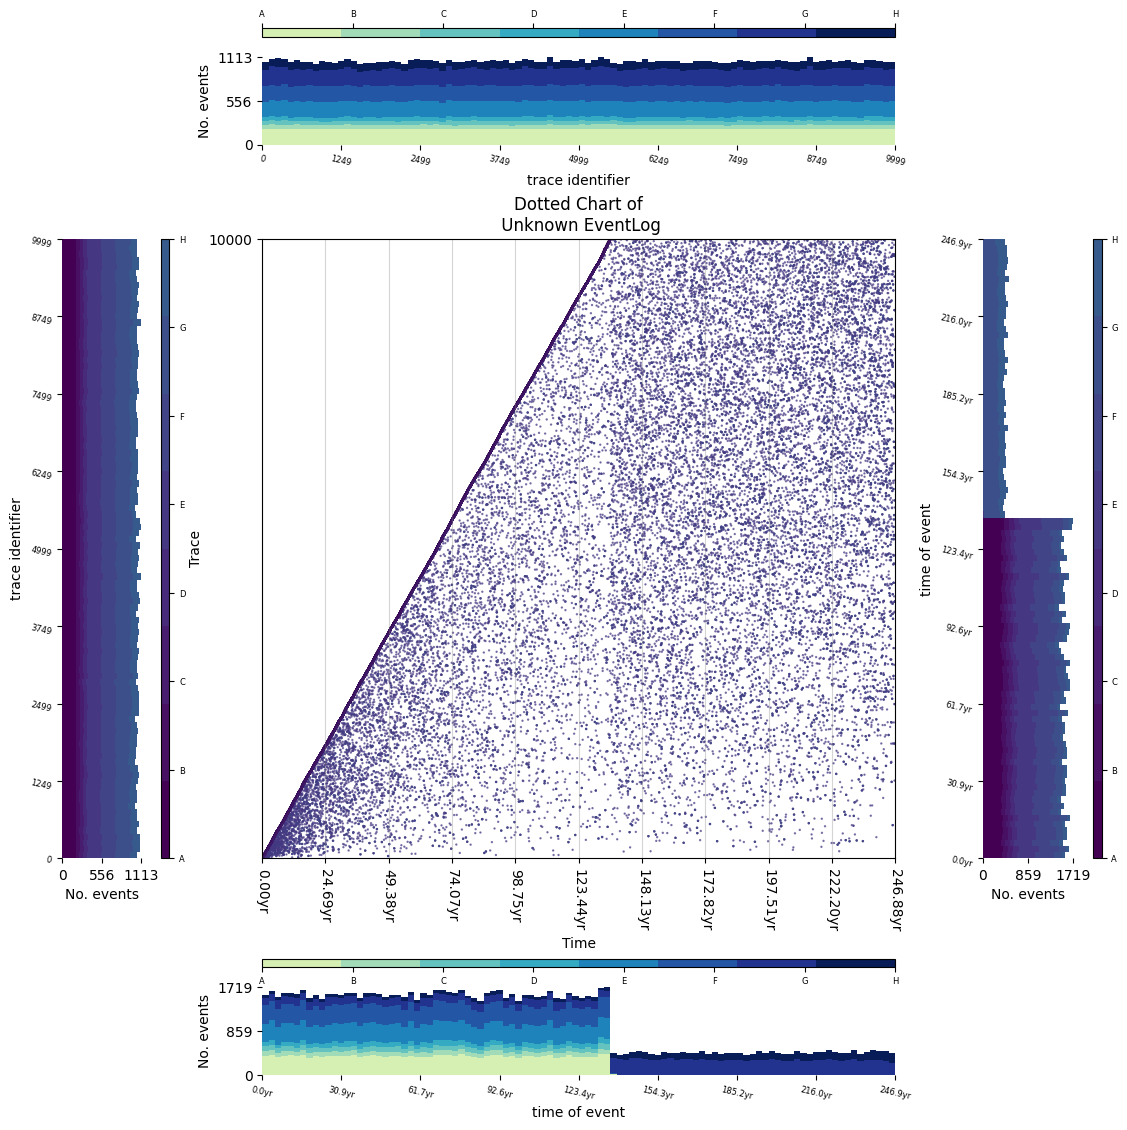

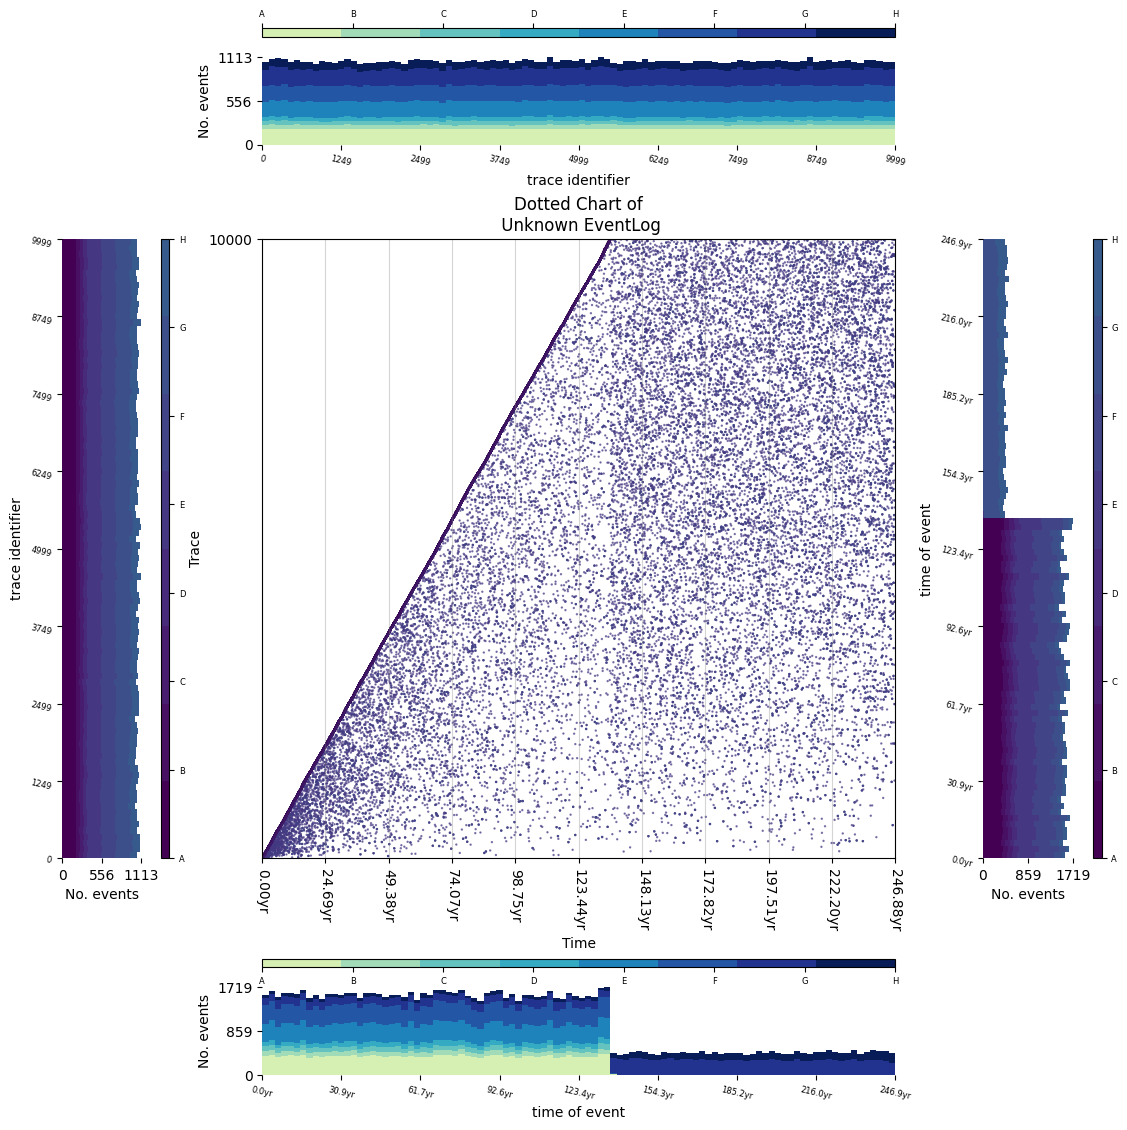

In [64]:
# 1. setup up colour schemes to use
from vispm import StaticDottedChartPresentor, DottedColourHistogramExtension, DottedEventHistogramExtension
from vispm.helpers.colours.colourmaps import HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM,EARTH,COOL_WINTER,CATEGORICAL
from vispm import StaticDottedChartPresentor,DottedColourHistogramExtension

import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap

colourmaps = [COOL_WINTER,EARTH,HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM, CATEGORICAL]
seq_colourmap = np.vstack(
    (
    colourmaps[0](np.linspace(0.20,1,8)),
    colourmaps[1](np.linspace(0.20,1,8)),
    colourmaps[2](np.linspace(0.20,1,8)),
    colourmaps[3](np.linspace(0.20,1,8)),
    colourmaps[4](np.linspace(0.20,1,8))
    
    )
)
seq_colourmap = ListedColormap(seq_colourmap, name='VARIANCE')
cmap = get_cmap(HIGH_CONTRAST_COOL, 26)


# 2. create a presentor and add extensions
presentor = StaticDottedChartPresentor(cp_event_log,dpi=100,
    event_colour_scheme=StaticDottedChartPresentor.EventColourScheme.EventLabel,
    colormap=cmap
)

ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.SOUTH,
    bin_axes=DottedEventHistogramExtension.PlotAxes.X,
    colourmap=seq_colourmap
)
presentor.add_extension(ext)
ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.NORTH,
    bin_axes=DottedEventHistogramExtension.PlotAxes.Y,
    colourmap=seq_colourmap
)
presentor.add_extension(ext)
ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.WEST,
    bin_axes=DottedEventHistogramExtension.PlotAxes.Y,
    colourmap=cmap
)
presentor.add_extension(ext)
ext = DottedEventHistogramExtension(
    direction=DottedEventHistogramExtension.Direction.EAST,
    bin_axes=DottedEventHistogramExtension.PlotAxes.X,
    colourmap=cmap
)
presentor.add_extension(ext)

presentor.plot()

[StaticDottedChartPresentor] Processing event data... 
[StaticDottedChartPresentor] Cannot find concept:name in eventlog attributes. 
[StaticDottedChartPresentor] Ready to plot... 
[StaticDottedChartPresentor] Added extension : DescriptionHistogramExtension 
[StaticDottedChartPresentor] Added extension : DescriptionHistogramExtension 
[StaticDottedChartPresentor] Added extension : DescriptionHistogramExtension 
[StaticDottedChartPresentor] Added extension : DescriptionHistogramExtension 
[StaticDottedChartPresentor] Compiling finished...         
[StaticDottedChartPresentor] Plotting data... 
[DescriptionHistogramExtension] plotting histogram 
[DescriptionHistogramExtension] Event labels are imputed as :: {'invite reviewers': 'A', 'time-out 1': 'B', 'time-out 2': 'C', 'time-out 3': 'D', 'collect reviews': 'E', 'decide': 'F', 'get review X': 'G', 'reject': 'H'} 
[DescriptionHistogramExtension] plotting histogram 
[DescriptionHistogramExtension] plotting histogram 
[DescriptionHistogramE

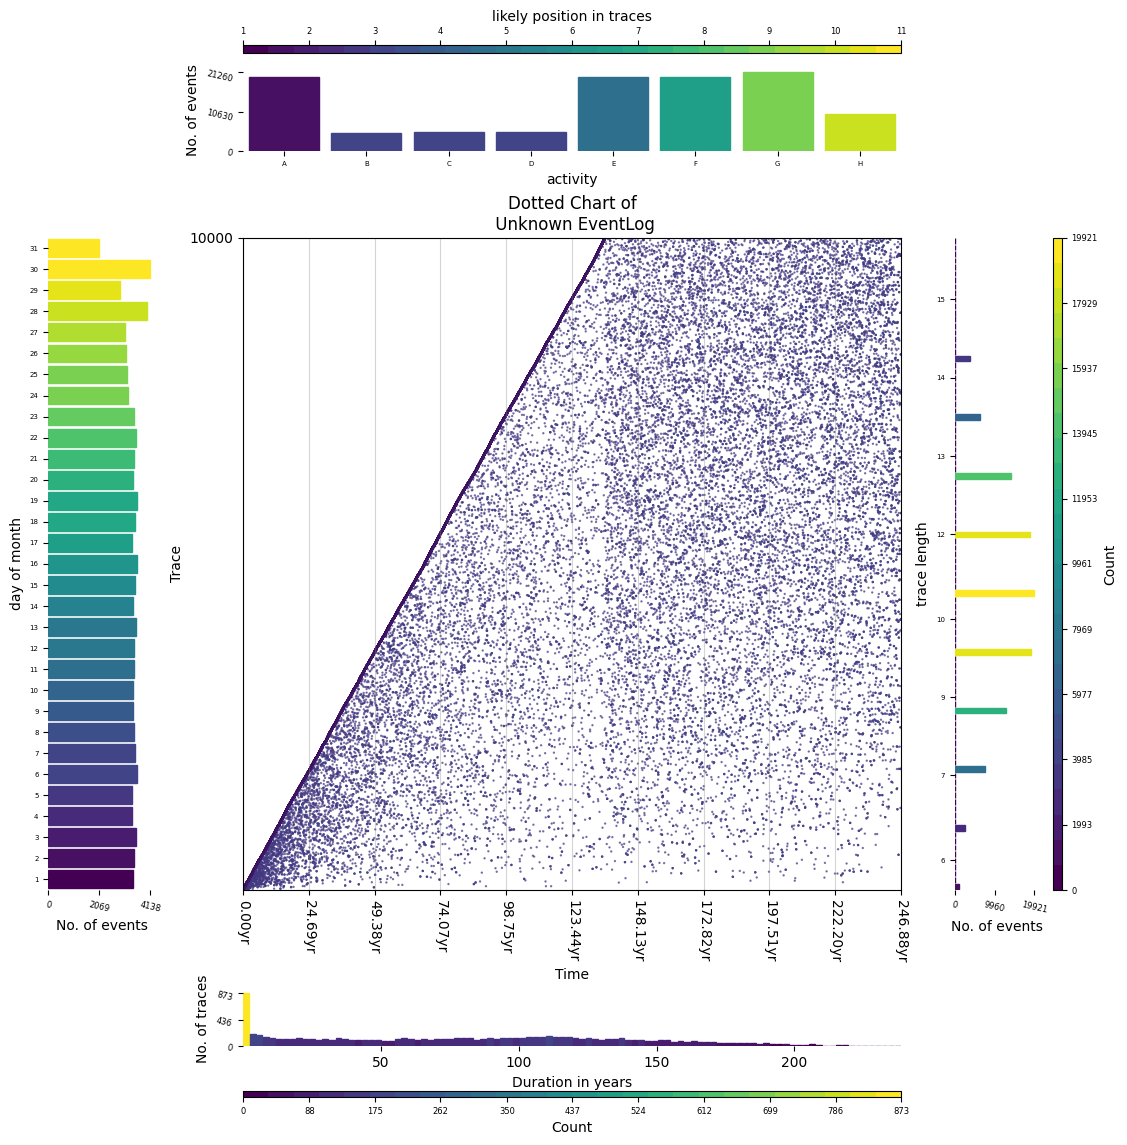

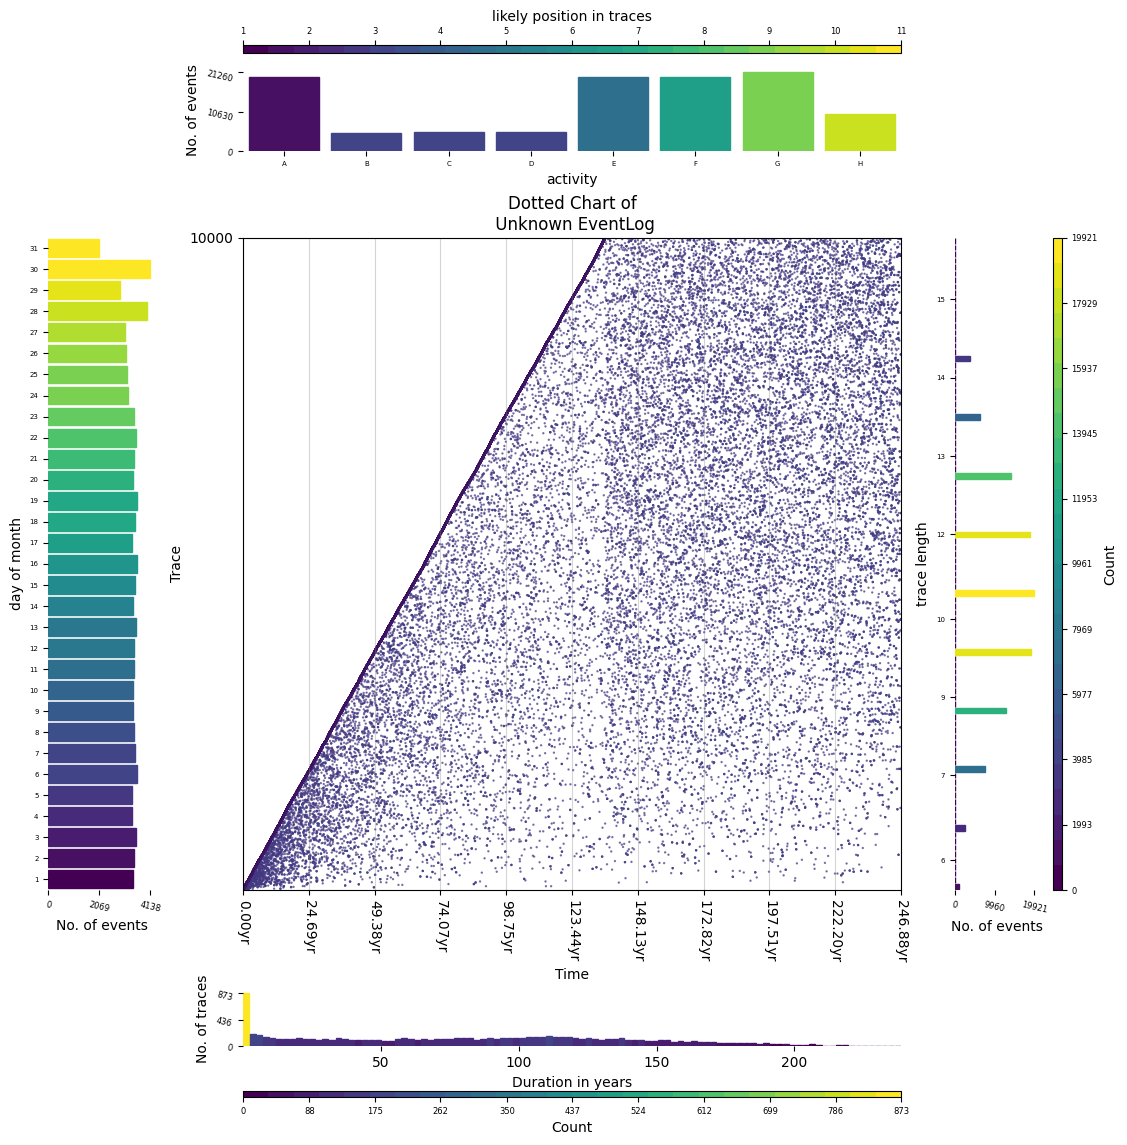

In [65]:
#DescriptionHistogramExtension
#This extension describes an aspect of the event log.
# For example, a breakdown of trace duration, or trace length (by the number of activities), or event label, or when events occur (weekday or monthday).

#The following example shows how to use this extension to understand the properties of event log, alongside a dotted chart.


from vispm import DescriptionHistogramExtension
from vispm.helpers.colours.colourmaps import HIGH_CONTRAST_COOL,HIGH_CONTRAST_WARM,EARTH,COOL_WINTER,CATEGORICAL
from vispm import StaticDottedChartPresentor,DottedColourHistogramExtension


cmap = get_cmap(HIGH_CONTRAST_COOL, 26)
presentor = StaticDottedChartPresentor(cp_event_log,dpi=100,
    event_colour_scheme=StaticDottedChartPresentor.EventColourScheme.EventLabel,
    colormap=cmap
)

ext = DescriptionHistogramExtension(
)
presentor.add_extension(ext)

ext = DescriptionHistogramExtension(
    direction=DescriptionHistogramExtension.Direction.EAST,
    describe=DescriptionHistogramExtension.Describe.TraceLength,
    density=DescriptionHistogramExtension.Density.Event
)
presentor.add_extension(ext)

ext = DescriptionHistogramExtension(
    direction=DescriptionHistogramExtension.Direction.SOUTH,
    describe=DescriptionHistogramExtension.Describe.TraceDuration,
    density=DescriptionHistogramExtension.Density.Trace
)
presentor.add_extension(ext)

ext = DescriptionHistogramExtension(
    direction=DescriptionHistogramExtension.Direction.WEST,
    describe=DescriptionHistogramExtension.Describe.Monthday,
    density=DescriptionHistogramExtension.Density.Event
)
presentor.add_extension(ext)

presentor.plot()